In the context of data types, "ordered" data refers to ordinal data.
Ordinal data is a type of categorical data with an order (or rank).
The order of these values is significant and typically represents some sort of hierarchy.
For example, ratings data (like "poor", "average", "good", "excellent") is ordinal
because there is a clear order to the categories.


|**age**         | AgeReal
|---             |---
|**sex**         | Binary
|---             |---
|**cp**          | Chest pain type (4 values) - Nominal
|---             |---
|**trestbps**    | Resting blood age - Real
|---             |---
|**chol**        | Serum cholesterol (in mg/dl) - Real
|---             |---
|**fbs**         | Fasting blood sugar > 120 mg/dl - Binary
|---             |---
|**restecg**     | Resting electrocardiographic results (values 0,1,2) - Nominal
|---             |---
|**thalach**     | Maximum heart rate achieved - Real
|---             |---
|**exang**       | Exercise induced angina - Binary
|---             |---
|**oldpeak**     | Oldpeak = ST depression induced by exercise relative to rest - Real
|---             |---
|**slope**       | The slope of the peak exercise ST segment - Ordered
|---             |---
|**ca**          | Number of major vessels (0-3) colored by flouroscopy - Real
|---             |---
|**thal**        | Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect - Nominal
|---             |---
|**target**      | 1 = no disease; 2 = presence of disease

In [42]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

detail = {"age": "Age", "sex": "Sex", "cp": "Chest Pain Type", "trestbps": "Resting Blood Pressure",
          "chol": "Serum Cholesterol", "fbs": "Fasting Blood Sugar", "restecg": "Resting ECG",
          "thalach": "Max Heart Rate", "exang": "Exercise Induced Angina", "oldpeak": "Oldpeak",
          "slope": "Slope", "ca": "Number of major vessels", "thal": "Thal", "target": "(0 - no disease, 1 - disease))"}

# Data Pre-Processing


In [43]:
sns.set_theme(context="paper", font_scale=1.5, style="whitegrid", palette="Set2")

data = pd.read_csv("heart.dat", sep="\\s+", header=None)

data.columns = detail.keys()
data_default = data.copy()
# print(data.head())


# Check for missing values
missingValues = data.isnull().sum().sum()
print("Number of missing values:", missingValues)

# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicates:", duplicates)

noFeatures = data.shape[1]-1
print("Number of features: ", noFeatures)

numericalFeatures = ("age", "sex", "trestbps", "chol", "fbs", "thalach", "exang", "oldpeak", "ca")
categoricalFeatures = ("cp", "restecg", "slope", "thal")

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]


oneHot_X = pd.get_dummies(X, columns = ["cp", "restecg", "slope", "thal"])

# print(X.head())


Number of missing values: 0
Number of duplicates: 0
Number of features:  13
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   slope   ca  thal  
0    2.0  3.0   3.0  
1    2.0  0.0   7.0  
2    1.0  0.0   7.0  
3    2.0  1.0   7.0  
4    1.0  1.0   3.0  


# Feature Correlation

## Heatmap

Only numeric features: continuous - age, trestbps, chol, thalach, oldpeak / ordered - ca

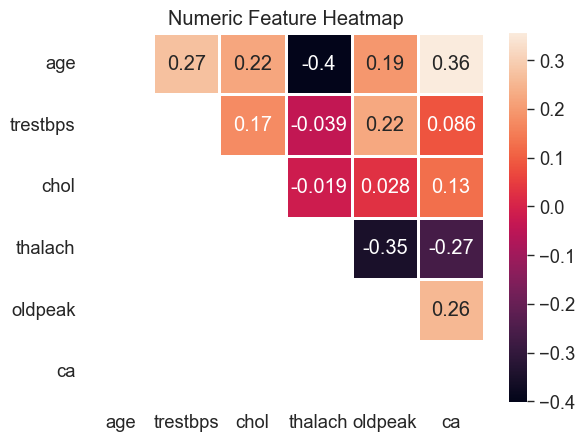

In [187]:
numericFeatures = ["trestbps", "chol", "thalach", "oldpeak", "ca"]
# considering ca ordered as only has 4 values
categoricalFeatures = ["cp", "fbs", "restecg", "exang", "slope", "thal"]
special = ["age", "sex", "target"]

data_numeric = data_default[[special[0]] + numericFeatures]
dataCorr = data_numeric.corr()


upperHalf_mask = np.tril(np.ones_like(dataCorr, dtype=bool))

# print(data_numeric.head())
plt.figure()
plt.title("Numeric Feature Heatmap")
sns.heatmap(dataCorr, annot=True, linewidths=2, mask=upperHalf_mask)
# plt.savefig(f"plots/numeric_heatmap.png")
plt.show()

# Naive Bayes

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Create empty lists to store the evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


for random_state in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
    # Perform further analysis or model training with the current split
    # Create a Naive Bayes classifier
    model = GaussianNB()

    # Train the model using the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    # pos_label referes to the HD presence class (the positive class)
    pos_label = 1
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Append the evaluation metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Print the evaluation metrics for the current iteration
    # print("Confusion Matrix:")
    # print(pd.DataFrame(cm, columns=["Predicted HD Absence", "Predicted HD Presence"], index=["Actual HD Absence", "Actual HD Presence"]))
    # print()


# Create a DataFrame to store the evaluation metrics for each iteration
metrics_df = pd.DataFrame({
    "Iteration": range(1, 6),
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1 Score": f1_list
})

# Print the metrics table
print("Metrics Table:")
print(metrics_df)


Metrics Table:
   Iteration  Accuracy  Precision    Recall  F1 Score
0          1  0.740741   0.766667  0.766667  0.766667
1          2  0.870370   0.875000  0.903226  0.888889
2          3  0.796296   0.888889  0.750000  0.813559
3          4  0.759259   0.800000  0.774194  0.786885
4          5  0.740741   0.687500  0.846154  0.758621


Metrics Table:
   Iteration  Accuracy  Precision    Recall  F1 Score
0          1  0.740741   0.766667  0.766667  0.766667
1          2  0.870370   0.875000  0.903226  0.888889
2          3  0.796296   0.888889  0.750000  0.813559
3          4  0.759259   0.800000  0.774194  0.786885
4          5  0.740741   0.687500  0.846154  0.758621

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Create empty lists to store the evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


for random_state in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
    # Perform further analysis or model training with the current split
    # Create a Naive Bayes classifier
    model = GaussianNB()

    # Train the model using the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    # pos_label referes to the HD presence class (the positive class)
    pos_label = 1
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Append the evaluation metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Print the evaluation metrics for the current iteration
    # print("Confusion Matrix:")
    # print(pd.DataFrame(cm, columns=["Predicted HD Absence", "Predicted HD Presence"], index=["Actual HD Absence", "Actual HD Presence"]))
    # print()


# Create a DataFrame to store the evaluation metrics for each iteration
metrics_df = pd.DataFrame({
    "Iteration": range(1, 6),
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1 Score": f1_list
})

# Print the metrics table
print("Metrics Table:")
print(metrics_df)


Metrics Table:
   Iteration  Accuracy  Precision    Recall  F1 Score
0          1  0.740741   0.766667  0.766667  0.766667
1          2  0.870370   0.875000  0.903226  0.888889
2          3  0.796296   0.888889  0.750000  0.813559
3          4  0.759259   0.800000  0.774194  0.786885
4          5  0.740741   0.687500  0.846154  0.758621
